# Customer Churn Analysis

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# Importing Neccessary Library.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

dfc=pd.read_csv('telecom_customer_churn.csv')
dfc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset contain both numerical and categorical data. It is classification type.

In [3]:
# Checking the top rows

dfc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking the bottom rows

dfc.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Checking the random sample

dfc.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5611,6847-KJLTS,Female,1,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.40,5749.8,No
827,9146-JRIOX,Female,0,Yes,Yes,14,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.55,372.45,No
4569,7639-SUPCW,Female,0,No,No,22,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.80,1054.6,Yes


In [6]:
# Checking the shape of data

dfc.shape

(7043, 21)

There are 7043 rows and 21 columns present in the data set

In [7]:
# Checking the information

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking the data type

dfc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The data contain both object and integer data type

In [9]:
# Checking the value count of each columns
for i in dfc:
    print(dfc[i].value_counts())
    print("##############################################################")

0774-IFUVM    1
7823-JSOAG    1
8734-FNWVH    1
6527-PZFPV    1
6060-DRTNL    1
             ..
8592-PLTMQ    1
1820-DJFPH    1
6407-UTSLV    1
6419-ZTTLE    1
9095-HFAFX    1
Name: customerID, Length: 7043, dtype: int64
##############################################################
Male      3555
Female    3488
Name: gender, dtype: int64
##############################################################
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
##############################################################
No     3641
Yes    3402
Name: Partner, dtype: int64
##############################################################
No     4933
Yes    2110
Name: Dependents, dtype: int64
##############################################################
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
##############################################################
Yes    6361
No      682
Name: Phon

In [10]:
# Checking the column names

dfc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Checking the null value

dfc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value present in data

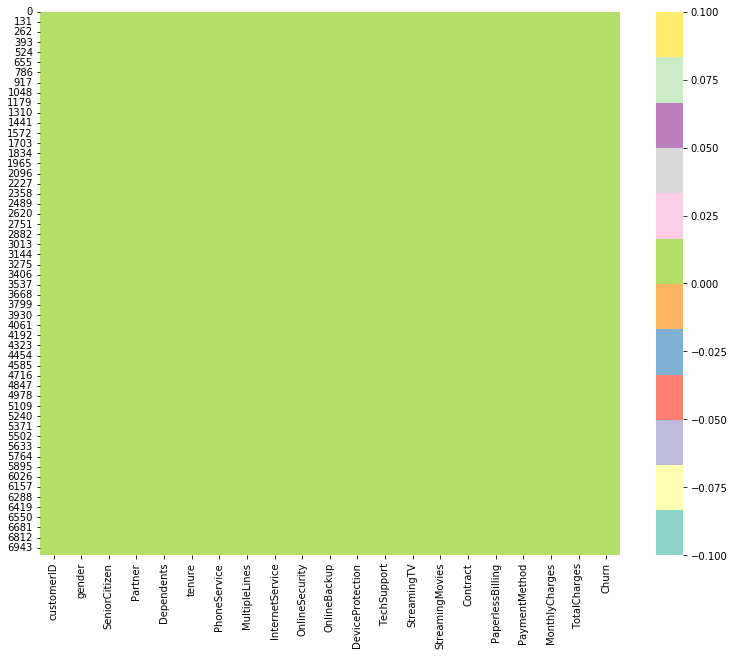

In [12]:
plt.figure(figsize=(13,10))
sns.heatmap(dfc.isnull(),cmap='Set3')
plt.show()

In [13]:
#Checking the unique value
dfc.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
# Checking the space in Total Charges
dfc.loc[dfc["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 rows in Total charges having a space.

In [15]:
dfc['TotalCharges']=dfc['TotalCharges'].replace(' ',np.nan)

In [16]:
dfc.loc[dfc["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


We have removed the space in Total Charges

In [17]:
dfc['TotalCharges'].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
2538.05     1
937.6       1
555.4       1
1813.1      1
6316.2      1
Name: TotalCharges, Length: 6530, dtype: int64

In [18]:
#Checking the null value
dfc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After filling the space with np.na, there are 11 null values in TotalCharges. Let's replace them with mean value

In [19]:
dfc['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
dfc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges is showing as Object data type, which is not correct. It is float data type. Let's convert them into Float data type

In [21]:
dfc['TotalCharges']=dfc['TotalCharges'].astype(float)

In [22]:
dfc['TotalCharges'].dtypes

dtype('float64')

We have successfully converted into float data type

In [23]:
dfc['TotalCharges'].mean()

2283.3004408418697

In [24]:
dfc['TotalCharges']=dfc['TotalCharges'].fillna(dfc['TotalCharges'].mean())

In [25]:
# Checking the null value after replacing the nan with mean value in Total Charges
dfc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value

In [26]:
# Checking the categorical data

categorical_data=[]
for i in dfc.dtypes.index:
    if dfc.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [27]:
# Checking the Numerical data

numerical_data=[]
for i in dfc.dtypes.index:
    if dfc.dtypes[i]!='object':
        numerical_data.append(i)
print(numerical_data)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# Checking the Churn Count
dfc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

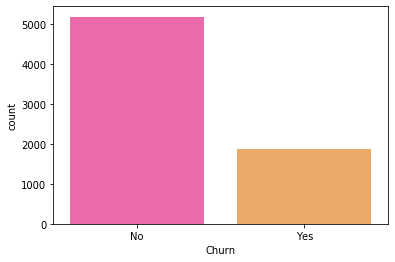

In [29]:
sns.countplot(dfc['Churn'],palette='spring')
plt.show()

In [30]:
# Let's drop the customer id column

dfc=dfc.drop('customerID',axis=1)
dfc.shape

(7043, 20)

We have removed the customerID Column from the dataset

Male      3555
Female    3488
Name: gender, dtype: int64


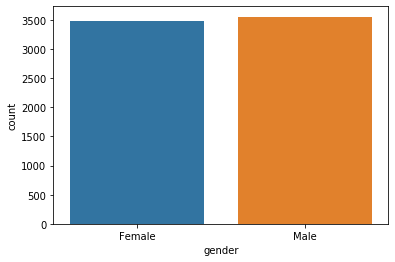

In [31]:
# Viewing the gender count using countplot

print(dfc['gender'].value_counts())
sns.countplot(dfc['gender'])
plt.show()

Male and femal almost equal, only slight difference. Male count is high as compare with Female count

In [32]:
dfc['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


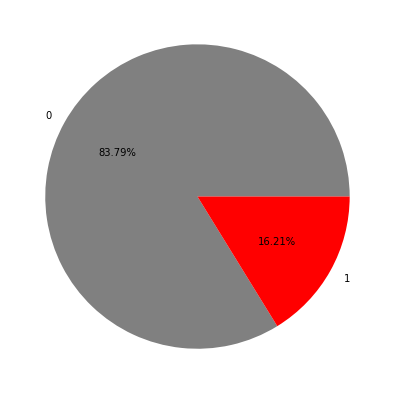

In [33]:
# Checking the Senior Citizen count

print(dfc['SeniorCitizen'].value_counts())
label='0','1'
figure,axes=plt.subplots(figsize=(7,7))
axes.pie(dfc['SeniorCitizen'].value_counts(),labels=label,autopct='%1.2f%%',colors=['grey','red'])
plt.show()

0 is non-senior citizenship and 1 is senior citizenship. Non Senior citizenship is more than the senior citizenship

In [34]:
dfc['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

No     4933
Yes    2110
Name: Dependents, dtype: int64


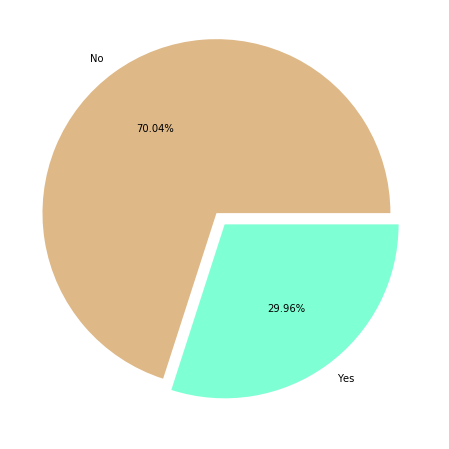

In [35]:
# Viewing the Dependents count using Pie Plot
print(dfc['Dependents'].value_counts())
label='No','Yes'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['Dependents'].value_counts(),labels=label,autopct='%1.2f%%',colors=['burlywood','aquamarine'],explode=(0.08,0))
plt.show()

Yes represent dependent and No represent not dependent. Majority of people is not dependent.

In [36]:
dfc['Partner'].unique()

array(['Yes', 'No'], dtype=object)

No     3641
Yes    3402
Name: Partner, dtype: int64


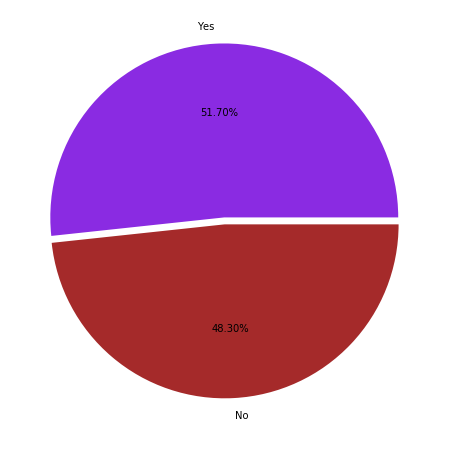

In [37]:
# Viewing the Partner count using Pie plot

print(dfc['Partner'].value_counts())
label='Yes','No'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['Partner'].value_counts(),labels=label,autopct='%1.2f%%',colors=['blueviolet','brown'],explode=(0.04,0))
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


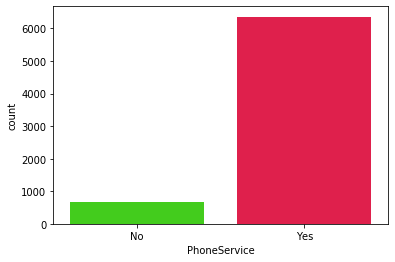

In [38]:
# Viewing the phone service using Countplot

print(dfc['PhoneService'].value_counts())
sns.countplot(dfc['PhoneService'],palette='prism')
plt.show()

Yes count is high 6361, majority of people using the phone service.

In [39]:
# Statistical summary of data

dfc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The count is equal in all the columns, there is no missing value present in data.
mean value is greater than 50% which is nothing but median. 
Senior Citizen mimumn count is zero and maximum count is 1.
Mean is greater than median, which means it is a left skewed


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


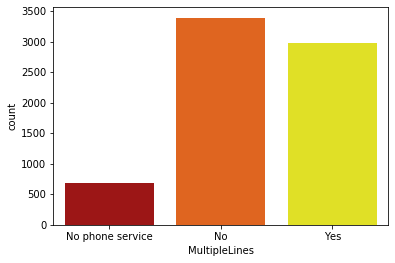

In [40]:
# Visualizing how many customers are using the MultipleLines
print(dfc['MultipleLines'].value_counts())
sns.countplot(dfc['MultipleLines'],palette='hot')
plt.show()

Majority of people are  using single phone line.

In [41]:
dfc['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


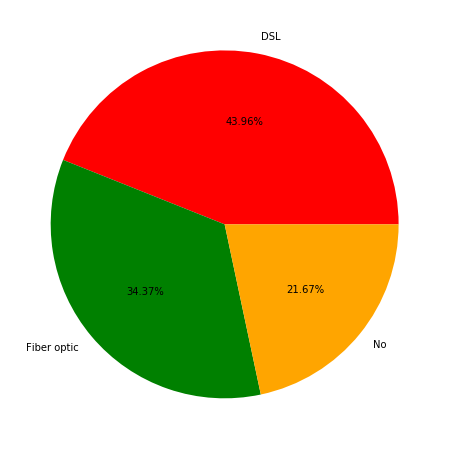

In [42]:
#Visualizing how many customers are using the internet service
print(dfc['InternetService'].value_counts())
label='DSL','Fiber optic','No'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['InternetService'].value_counts(),labels=label,autopct='%1.2f%%',colors=['red','green','orange'])
plt.show()

Majority of people using Fiber Optic Internet Service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


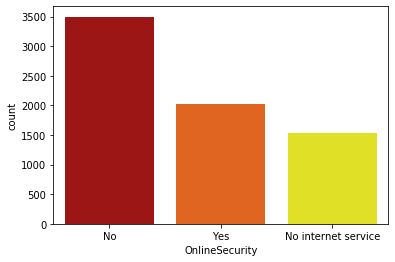

In [43]:
#Visualizing how many customers are using the Online security
print(dfc['OnlineSecurity'].value_counts())
sns.countplot(dfc['OnlineSecurity'],palette='hot')
plt.show()

Majority of customer are not using Online Security. Those who are using internet security they are using Online Security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


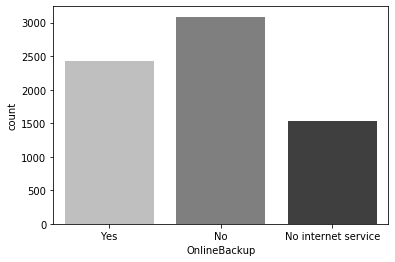

In [44]:
#Visualizing how many customers are having the Online Backup
print(dfc['OnlineBackup'].value_counts())
sns.countplot(dfc['OnlineBackup'],palette='binary')
plt.show()

Majority of customer don't have Online Backup. Customer who have internet service have less Online Backup.

In [45]:
dfc['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


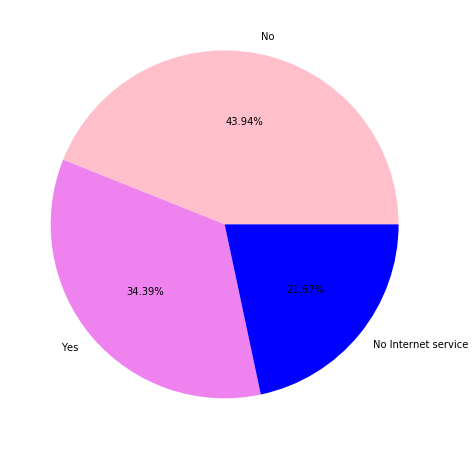

In [46]:
#Visualizing how many customers are having the Device Protection in their phone
print(dfc['DeviceProtection'].value_counts())
label='No','Yes','No Internet service'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['DeviceProtection'].value_counts(),labels=label,autopct='%1.2f%%',colors=['pink','violet','blue'])
plt.show()

Majority of customers are not using the Device Protection to protect their information. The customer who are having internet service they are using less device protection. No intenet service it is obviously not required the device protection

In [47]:
dfc['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


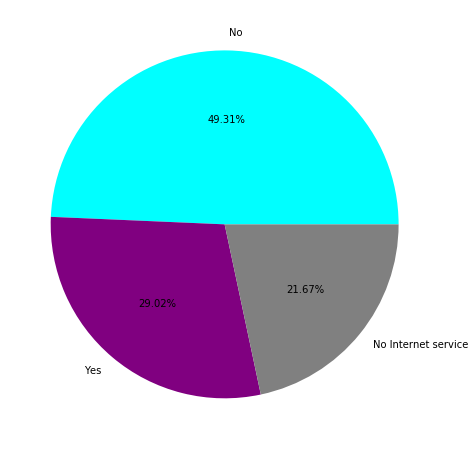

In [48]:
#Visualizing how many customers are having the Tech Support
print(dfc['TechSupport'].value_counts())
label='No','Yes','No Internet service'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['TechSupport'].value_counts(),labels=label,autopct='%1.2f%%',colors=['aqua','Purple','Grey'])
plt.show()

Majority of customer are having the Tech Support, this means they are not having internet service. Those are using the internet service they are having the less tech support. Those are not using any internet service they don't need the tech support.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


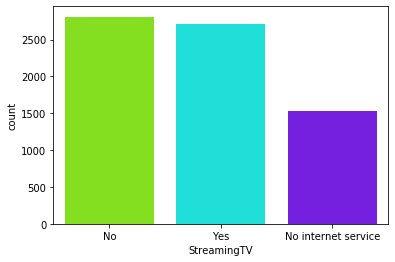

In [49]:
#Visualizing how many customers are having the Streaming TV
print(dfc['StreamingTV'].value_counts())
sns.countplot(dfc['StreamingTV'],palette='hsv')
plt.show()

The customer who are not having the StreamingTV count is high then the customer who is having the Streaming TV. The customer who is not having the internet service, they don't have Streaming TV.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


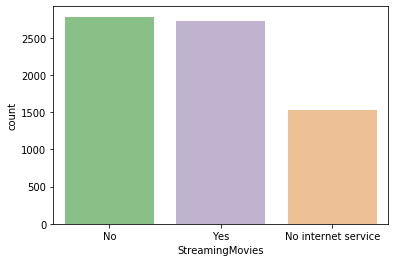

In [50]:
#Visualizing how many customers are having the Streaming Movies
print(dfc['StreamingMovies'].value_counts())
sns.countplot(dfc['StreamingMovies'],palette='Accent')
plt.show()

The customer who is having the streaming movies count is little bit high as compared to the customer who is having the streaming movies. Those who don't have Internet service, the streaming movies count is less.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


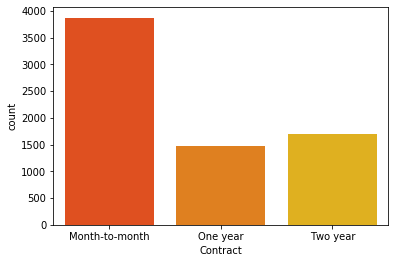

In [51]:
#Visualizing how many customers are prfer contract month wise or by years
print(dfc['Contract'].value_counts())
sns.countplot(dfc['Contract'],palette='autumn')
plt.show()

Majority of customer have contract month-to-month. It seems majority of customer prefer to have contract month-to-month rather than One year or Two year

In [52]:
dfc['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


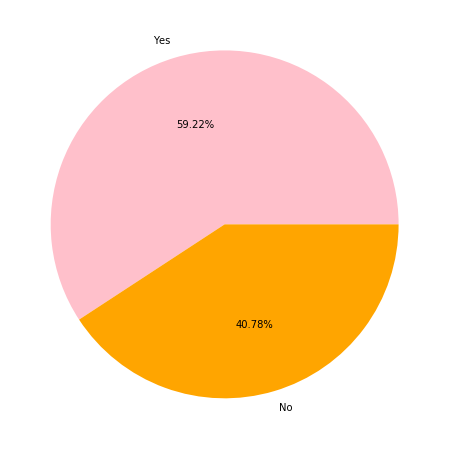

In [53]:
#Visualizing how many customers are using the Paperless Billing method
print(dfc['PaperlessBilling'].value_counts())
label='Yes','No'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['PaperlessBilling'].value_counts(),labels=label,autopct='%1.2f%%',colors=['Pink','Orange'])
plt.show()

Majority of customer prefer PaperlessBilling method rather than Paperwork. It is easy and time savings. Most of customer do Paperless Billing for Payment.

In [54]:
dfc['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


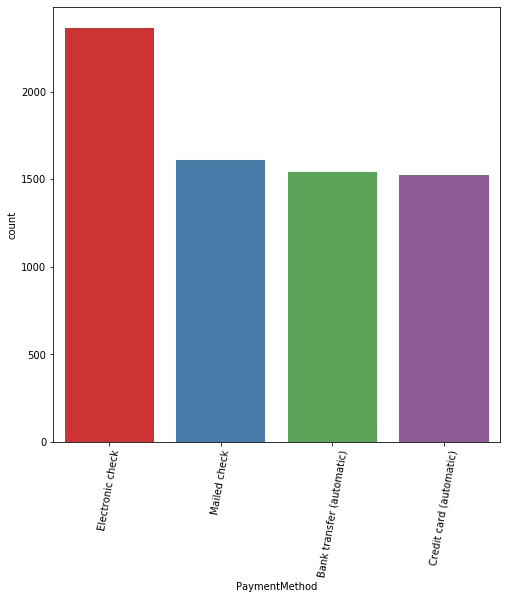

In [55]:
#Visualizing how many customers are using which payment method
print(dfc['PaymentMethod'].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(dfc['PaymentMethod'],palette='Set1')
plt.xticks(rotation=80)
plt.show()

Majority of customer prefer to do payment in Electronic Check, rather than Mailed check, bank transfer and credit card.

In [56]:
dfc['Churn'].unique()

array(['No', 'Yes'], dtype=object)

No     5174
Yes    1869
Name: Churn, dtype: int64


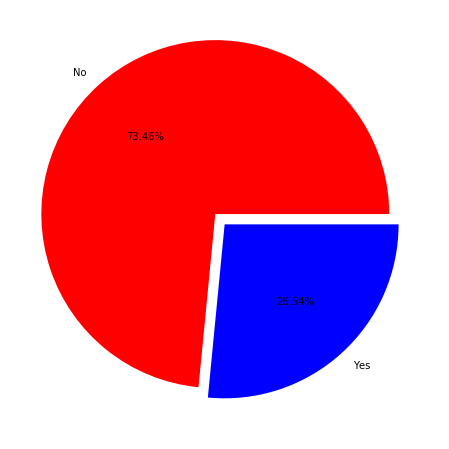

In [57]:
# Visualizing how many customers will do churn or not
print(dfc['Churn'].value_counts())
label='No','Yes'
figure,axes=plt.subplots(figsize=(8,8))
axes.pie(dfc['Churn'].value_counts(),labels=label,autopct='%1.2f%%',colors=['red','blue'],explode=(0.08,0))
plt.show()

Majority of customer don't do churn rather than the customer who do churn. They are loyal customer, who wants to continue with business

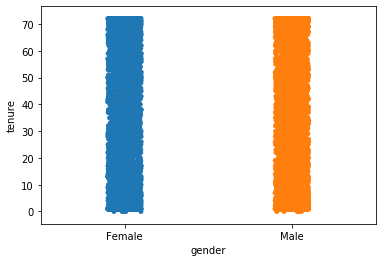

In [58]:
sns.stripplot(x='gender',y='tenure',data=dfc)

Both male and female do the tenure, they have the equal count.

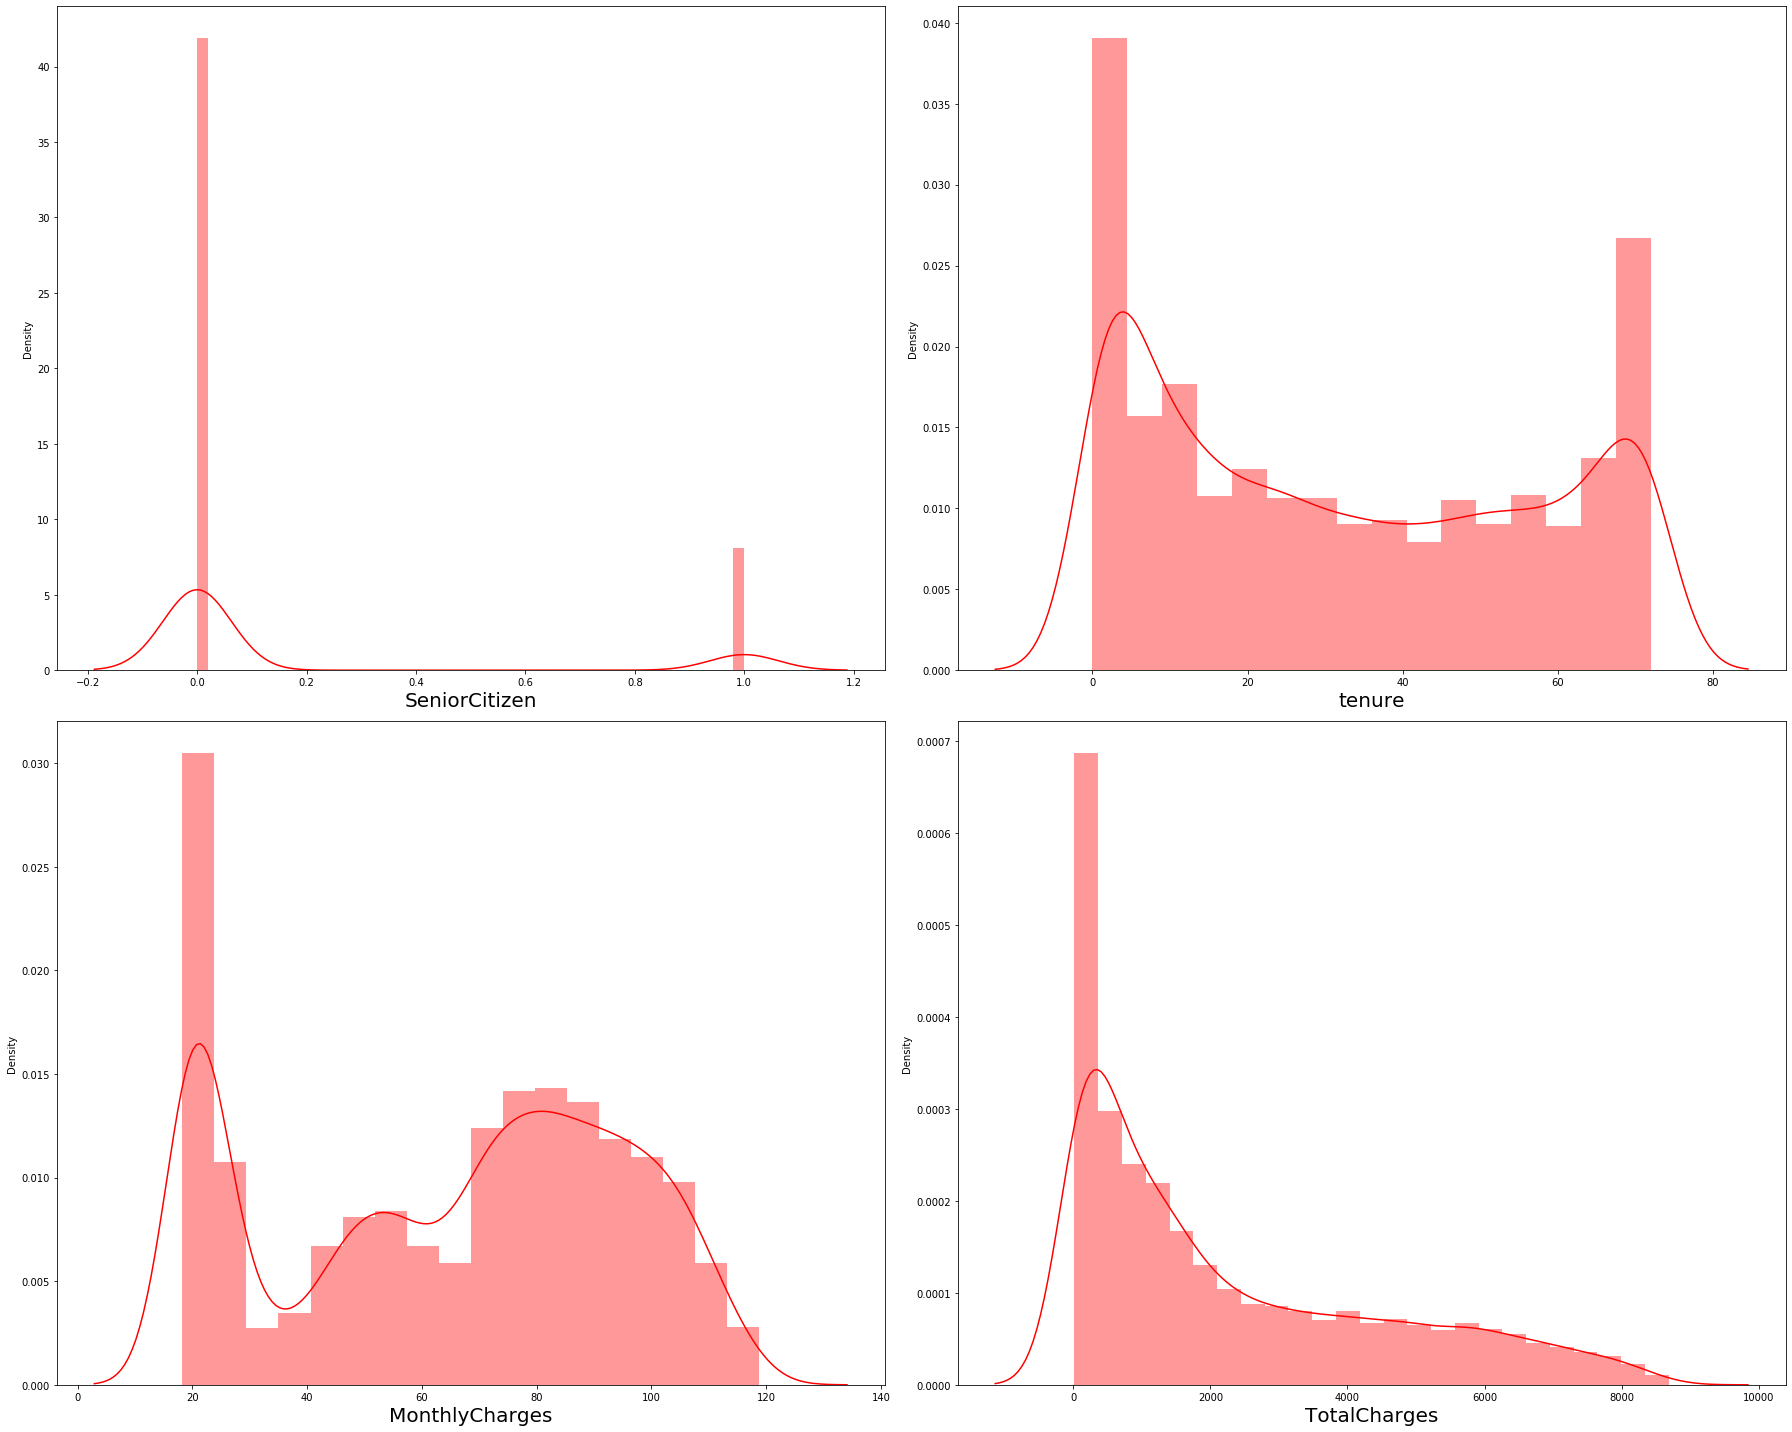

In [59]:
# Visualizing the distribution plot for numerical data
plt.figure(figsize=(25,20))
plotnumber=1
for i in numerical_data:
    axes=plt.subplot(2,2,plotnumber)
    if plotnumber<=4:
        sns.distplot(dfc[i],color='red')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
    

In Senior Citizen column the data is not normally distributed. In Tenure and Monthly Charges don't have skewness present and the Total Charges the data is right skewed.

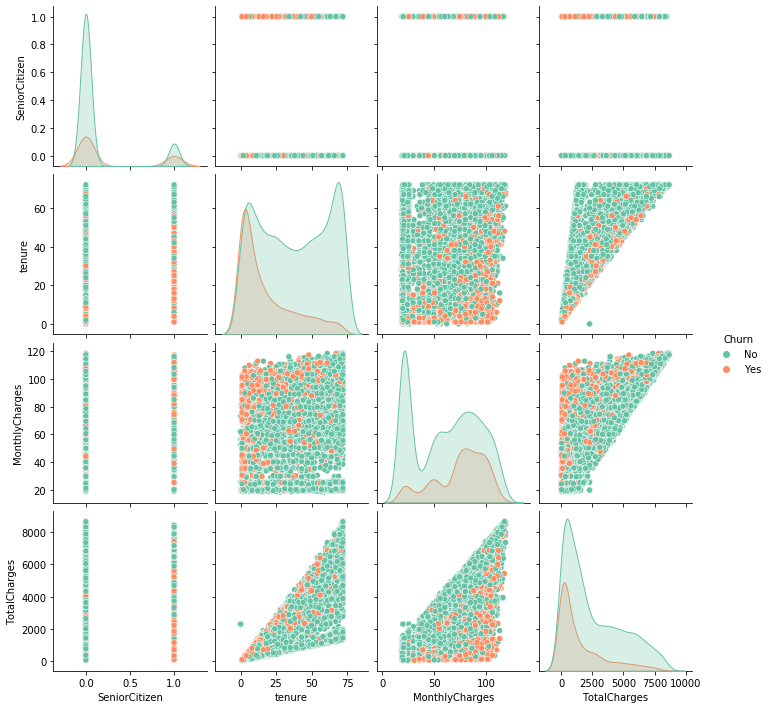

In [60]:
# Viewing the Pairplot

sns.pairplot(dfc,hue='Churn',palette='Set2')

In tenure, monthly charges, total charges it shows the linear relationship. In the diagnol it shows the data is normally distributed.

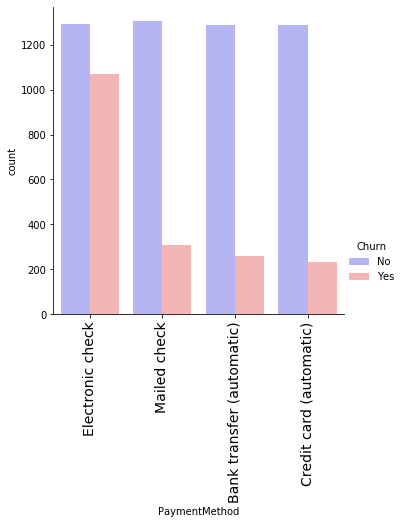

In [61]:
# Viewing the Payment method with Churn
sns.catplot(x='PaymentMethod',data=dfc,hue='Churn',kind='count',palette='bwr')
plt.xticks(rotation=90,fontsize=14)
plt.show()

The customer who is using Electronic check to do the payment, there is high chance of churn.

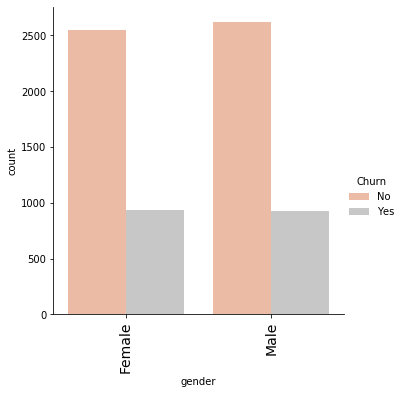

In [62]:
# Visualizing the gender with Churn
sns.catplot(x='gender',data=dfc,hue='Churn',kind='count',palette='RdGy')
plt.xticks(rotation=90,fontsize=14)
plt.show()

Both male and female have equal rate of Churn

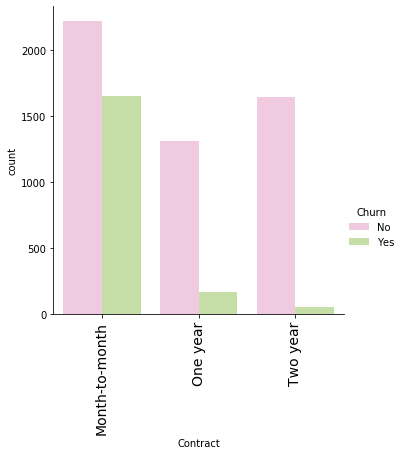

In [63]:
# Visualizing the Contract with Churn
sns.catplot(x='Contract',data=dfc,hue='Churn',kind='count',palette='PiYG')
plt.xticks(rotation=90,fontsize=14)
plt.show()

The customer who is having the contract month-to-month having the high rate of Churn. Those who are having 1 or 2 years contract they are very less rate of Churn.

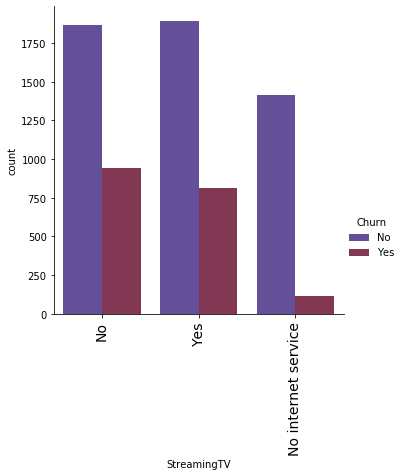

In [64]:
# Visualizing the StreamingTV with Churn
sns.catplot(x='StreamingTV',data=dfc,hue='Churn',kind='count',palette='twilight')
plt.xticks(rotation=90,fontsize=14)
plt.show()

The customer who is not having the Streaming TV, there is high Churn rate, rathan than who is having the Streaming TV and No internet service

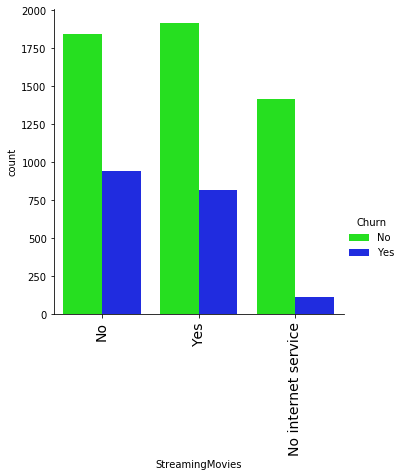

In [65]:
# Visualizing the StreamingMovies with Churn
sns.catplot(x='StreamingMovies',data=dfc,hue='Churn',kind='count',palette='hsv')
plt.xticks(rotation=90,fontsize=14)
plt.show()

Customer who is not having the Streaming Movies, high rate of Churn than who is having the Straming. Those who don't have internet service. there is very less rate of Churn

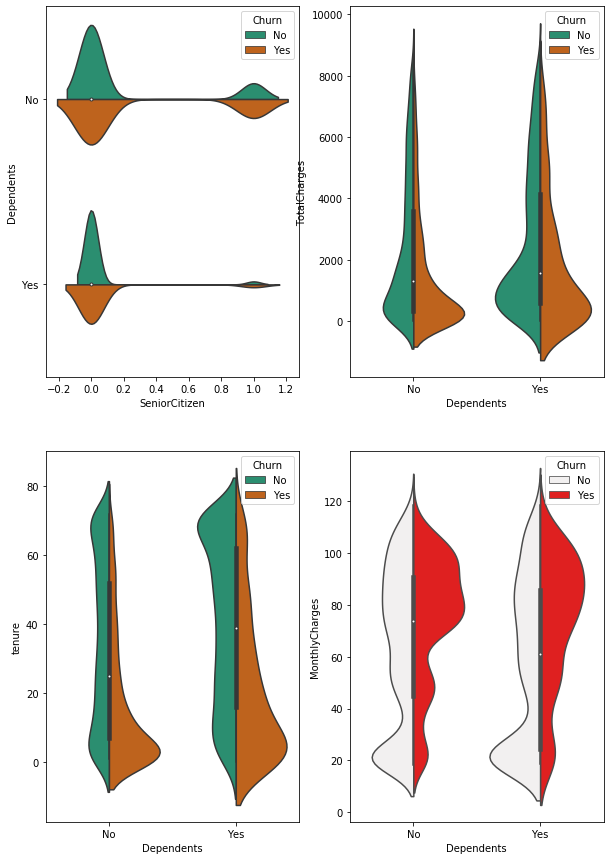

In [66]:
#Visualizing the different featurs with Churs using the violine Plot
figure,axes=plt.subplots(2,2,figsize=(10,15))
sns.violinplot(x='Dependents',y='MonthlyCharges',data=dfc,color='red',axes=axes[1,0],split=True,hue='Churn')

sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=dfc,palette="Dark2",hue="Churn",split=True)

sns.violinplot(x='SeniorCitizen',y='Dependents',ax=axes[0,0],data=dfc,palette="Dark2",hue="Churn",split=True)

sns.violinplot(x='Dependents',y='tenure',ax=axes[1,0],data=dfc,palette="Dark2",hue="Churn",split=True)

plt.show()

# Checking Outliers

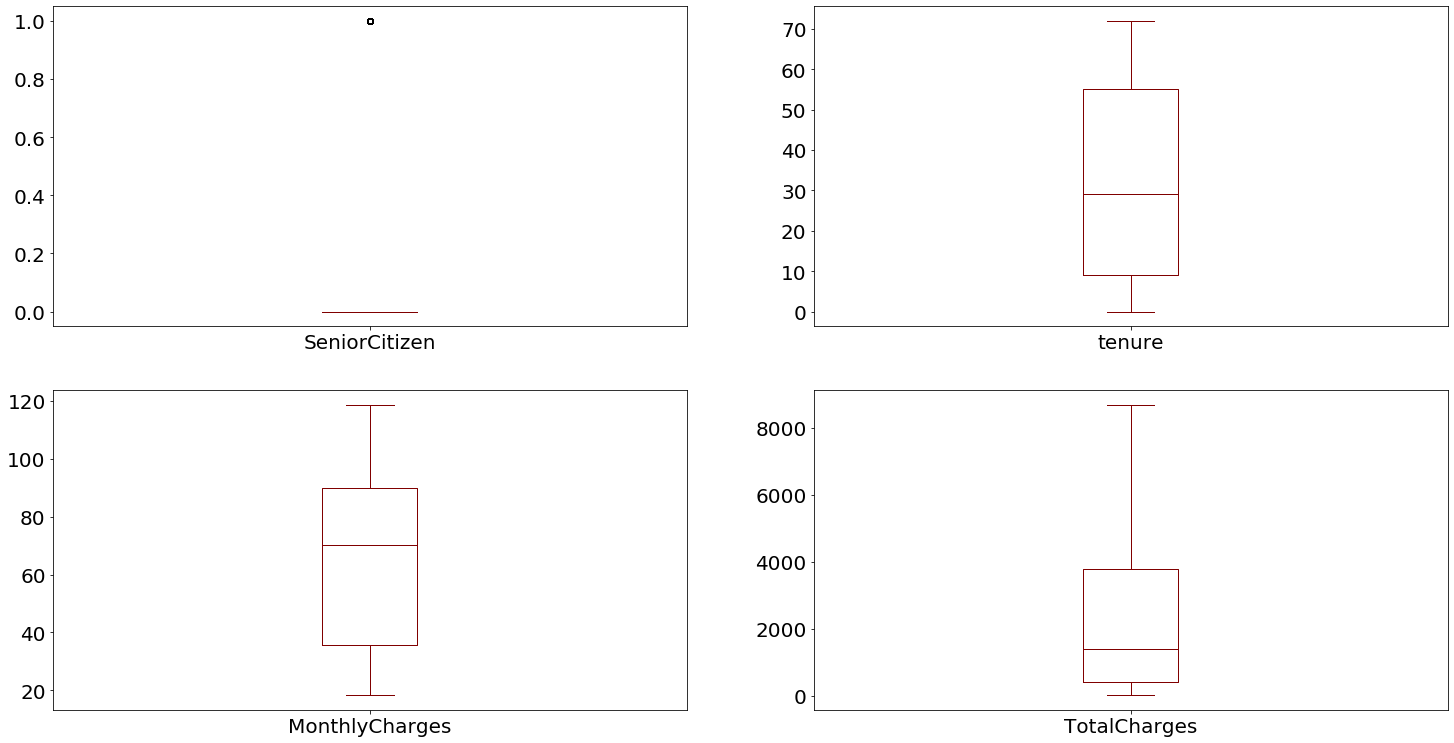

In [67]:
dfc.plot(kind='box',subplots=True,layout=(3,2),figsize=(25,20),color='Maroon',fontsize=20)
plt.show()

In Senior Citizen there is one outliers, as it is categorical data, we can ignore it. In other columns there is no outliers found.

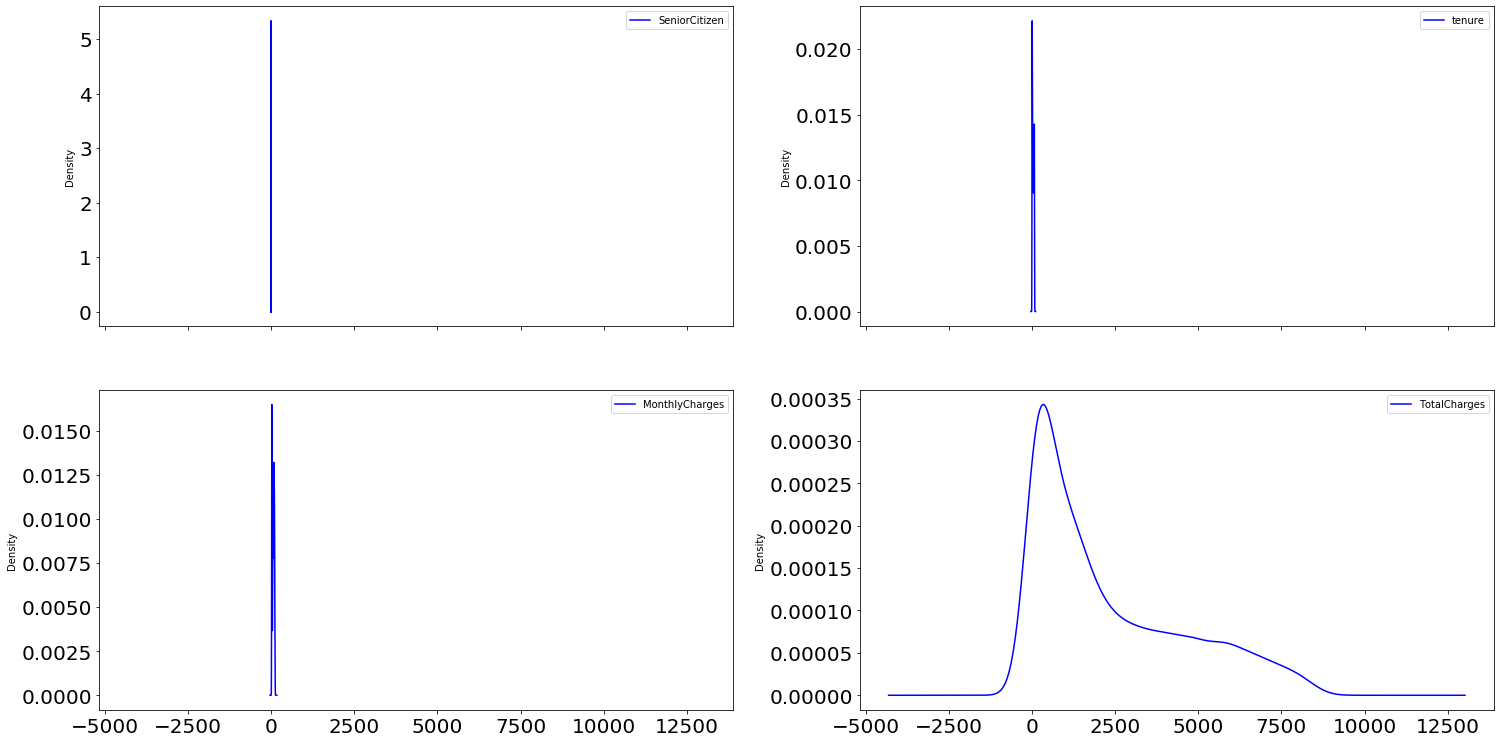

In [68]:
dfc.plot(kind='kde',subplots=True,layout=(3,2),figsize=(25,20),color='blue',fontsize=20)
plt.show()

# Skewness

In [69]:
dfc.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Skewness is present in SeniorCitizen and TotalCharges. As SeniorCitizen is categorical data, so we can ignore it. Let's remove the Skewness using PowerTransformer

In [70]:
from sklearn.preprocessing import PowerTransformer

In [71]:
skewed=['TotalCharges']

scaled=PowerTransformer(method='yeo-johnson')
scaled

PowerTransformer()

In [72]:
dfc[skewed]=scaled.fit_transform(dfc[skewed].values)

In [73]:
dfc[skewed]

,TotalCharges
0,-1.810588
1,0.253313
2,-1.387269
3,0.232253
4,-1.250118
...,...
7038,0.295688
7039,1.567097
7040,-0.859899
7041,-0.922968


In [74]:
dfc.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

We have removed the skewness that present in TotalCharges

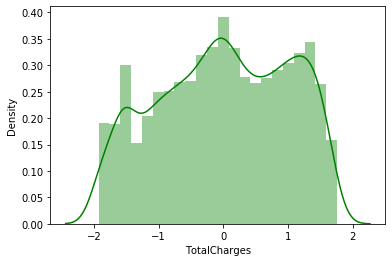

In [75]:
sns.distplot(dfc['TotalCharges'],color='green')  # Visualizing the Total Charges after removing the skewness
plt.show()

# Converting Categorical data to Numerical Data

# Ordinal Encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder

In [77]:
OE=OrdinalEncoder()

for column in dfc.columns:
    if dfc[column].dtypes=='object':
        dfc[column]=OE.fit_transform(dfc[column].values.reshape(-1,1))

In [78]:
dfc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


We have converted categorical data to numerical data successfully

# Correlation

In [79]:
dfc_corr=dfc.corr()
dfc_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


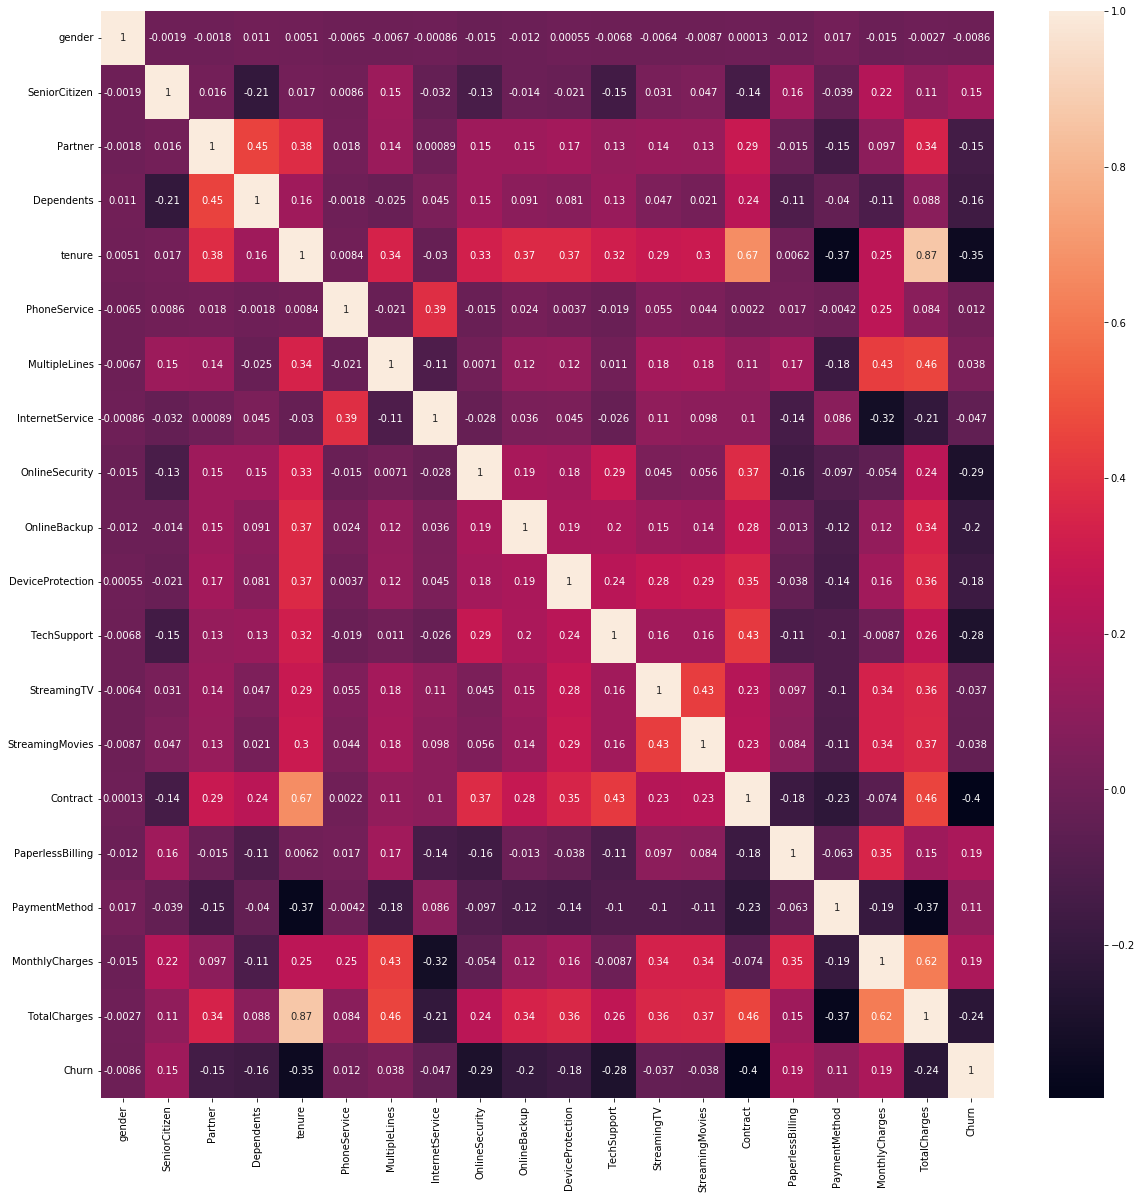

In [80]:
#Viewing the correlation using Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(dfc.corr(),annot=True)
plt.show()

In [81]:
dfc.corr()['Churn']

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.237089
Churn               1.000000
Name: Churn, dtype: float64

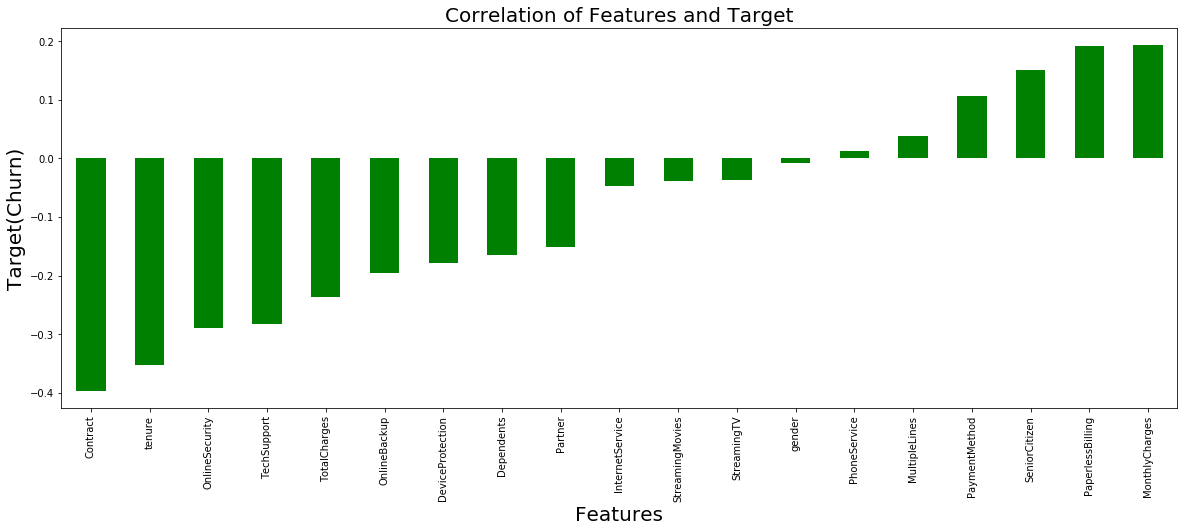

In [82]:
plt.figure(figsize=(20,7))
dfc.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target(Churn)',fontsize=20)
plt.title("Correlation of Features and Target",fontsize=20)
plt.show()

We see that there is both postive and negative correlation present in data. Gender and Phone Service have very less correlation.

# Splitting the data into Feature(X) and Target(Y)

In [83]:
x=dfc.drop('Churn',axis=1)

In [84]:
x.shape

(7043, 19)

In [85]:
y=dfc['Churn']

In [86]:
y.shape

(7043,)

# Scaling the data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [89]:
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -1.81058786],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894,  0.25331304],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.38726921],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85989943],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.92296815],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.48444325]])

In [90]:
# Making the data frame for the scaled data
x=pd.DataFrame(x_scaled,columns=x.columns)

In [91]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.567097
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.922968


# Variance Inflation Factor

In [92]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,VIF
0,gender,1.001684
1,SeniorCitizen,1.149730
2,Partner,1.463075
3,Dependents,1.384396
4,tenure,10.690306
5,PhoneService,1.622399
6,MultipleLines,1.397403
7,InternetService,1.866643
8,OnlineSecurity,1.252550
9,OnlineBackup,1.188767


There is a high variation inflation in Tenure and Total charges. This means Multicollinearity is present, Let's drop the column TotalCharges

In [93]:
x=x.drop('TotalCharges',axis=1)

In [94]:
# Checking the VIF After dropping the column TotalCharges
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,VIF
0,gender,1.001684
1,SeniorCitizen,1.149639
2,Partner,1.460856
3,Dependents,1.382106
4,tenure,2.754468
5,PhoneService,1.622282
6,MultipleLines,1.391652
7,InternetService,1.825876
8,OnlineSecurity,1.247696
9,OnlineBackup,1.185932


There is no high Variation inflation present in the data, no multicollinearity exist. We are good to proceed for Model Building

In [95]:
dfc['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

The data is not balance in the target(Churn) data. Let's balance the data using oversampling

# Over Sampling Technique to Balance the data

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [98]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

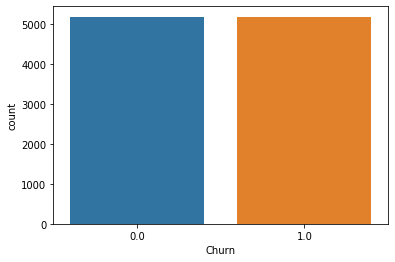

In [99]:
sns.countplot(y)

We have balanced the Churn Data

# Model Building

### Checking the best random state

In [100]:
from sklearn.ensemble import RandomForestClassifier

max_accu=0
max_RS=0
for i in range(1,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=i,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(train_x,train_y)
    rf_pred=rf.predict(test_x)
    accuracy=accuracy_score(test_y,rf_pred)
    if accuracy>max_accu:
        max_accu=accuracy
        max_RS=i
print("Accuracy Score is",max_accu,"On Random State:",max_RS)

Accuracy Score is 1.0 On Random State: 1


In [101]:
train_x.shape

(10149, 18)

In [102]:
train_y.shape

(10149,)

In [103]:
test_x.shape

(199, 18)

In [104]:
test_y.shape

(199,)

# Logistic Regression

In [105]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [106]:
lg_pred=lg.predict(test_x)
print("Predicted value:\n",lg_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1.]


In [107]:
print("Accuracy Score:",accuracy_score(test_y,lg_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,lg_pred),'\n')
print("Classification Report:\n",classification_report(test_y,lg_pred))

Accuracy Score: 0.7839195979899497 

Confusion Matrix:
 [[85 25]
 [18 71]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       110
         1.0       0.74      0.80      0.77        89

    accuracy                           0.78       199
   macro avg       0.78      0.79      0.78       199
weighted avg       0.79      0.78      0.78       199



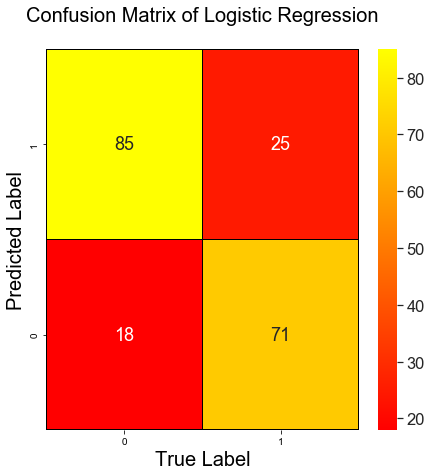

In [108]:
CM=confusion_matrix(test_y,lg_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='autumn',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Logistic Regression\n",fontsize=20)

plt.show()


# Principle Component Analysis

In [204]:
pca=PCA(n_components=8)
pca.fit(train_x,train_y)

PCA(n_components=8)

In [205]:
pca.explained_variance_

array([3.42381814, 2.26123557, 1.36612663, 1.13439333, 1.05074521,
       1.00917996, 0.9344382 , 0.81570279])

In [206]:
pca.components_

array([[ 0.00890392, -0.04595551,  0.26981995,  0.1669708 ,  0.43516143,
         0.04437442,  0.19146806,  0.03767768,  0.23415133,  0.27086064,
         0.32095268,  0.26864667,  0.29025063,  0.29034666,  0.35789782,
        -0.03041529, -0.1984961 ,  0.16545491],
       [-0.00625549, -0.38131324,  0.06106221,  0.24629765,  0.01288774,
        -0.11875854, -0.33200547,  0.04892209,  0.26785904,  0.04092774,
        -0.00934974,  0.22704153, -0.24874843, -0.25467227,  0.21934729,
        -0.36330687,  0.04895262, -0.47852402],
       [ 0.00350073,  0.19022807,  0.13598892,  0.0067974 ,  0.15561355,
        -0.58740717,  0.23776609, -0.57551142,  0.06651922,  0.04940596,
        -0.07078012, -0.00724323, -0.26601961, -0.22821229,  0.0257362 ,
         0.11658706, -0.19803228, -0.00244011],
       [-0.03829349, -0.22179642, -0.54664343, -0.42735876, -0.06291895,
        -0.38568353, -0.11654674, -0.17222122,  0.055191  , -0.03432979,
         0.22754438,  0.23979591,  0.26807761,  0.271

This are the components in PCA

# Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [111]:
dtc_pred=dtc.predict(test_x)
print("Predicted value:\n",dtc_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1.]


In [112]:
print("Accuracy Score:",accuracy_score(test_y,dtc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,dtc_pred),'\n')
print("Classification Report:\n",classification_report(test_y,dtc_pred))

Accuracy Score: 0.7889447236180904 

Confusion Matrix:
 [[84 26]
 [16 73]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80       110
         1.0       0.74      0.82      0.78        89

    accuracy                           0.79       199
   macro avg       0.79      0.79      0.79       199
weighted avg       0.79      0.79      0.79       199



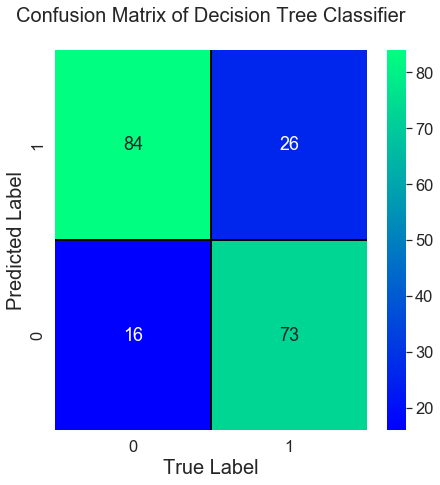

In [113]:
CM=confusion_matrix(test_y,dtc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='winter',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Decision Tree Classifier\n",fontsize=20)

plt.show()

# Random Forest Classifier

In [114]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [115]:
rfc_pred=rfc.predict(test_x)
print("Predicted value:\n",rfc_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1.]


In [116]:
print("Accuracy Score:",accuracy_score(test_y,rfc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,rfc_pred),'\n')
print("Classification Report:\n",classification_report(test_y,rfc_pred))

Accuracy Score: 0.8492462311557789 

Confusion Matrix:
 [[89 21]
 [ 9 80]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       110
         1.0       0.79      0.90      0.84        89

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.86      0.85      0.85       199



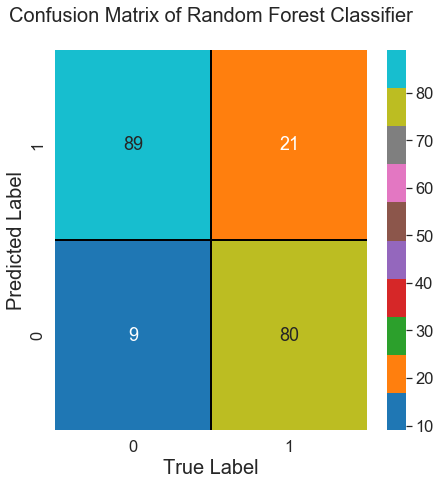

In [117]:
CM=confusion_matrix(test_y,rfc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='tab10',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Random Forest Classifier\n",fontsize=20)

plt.show()

# Kneighbors Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [119]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1.]


In [120]:
print("Accuracy Score:",accuracy_score(test_y,knn_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,knn_pred),'\n')
print("Classification Report:\n",classification_report(test_y,knn_pred))

Accuracy Score: 0.7839195979899497 

Confusion Matrix:
 [[74 36]
 [ 7 82]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.67      0.77       110
         1.0       0.69      0.92      0.79        89

    accuracy                           0.78       199
   macro avg       0.80      0.80      0.78       199
weighted avg       0.82      0.78      0.78       199



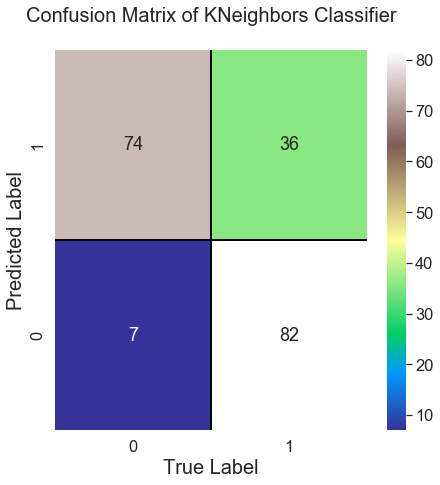

In [121]:
CM=confusion_matrix(test_y,knn_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='terrain',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of KNeighbors Classifier\n",fontsize=20)

plt.show()

# Support Vector Classifier

In [122]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(train_x,train_y)

SVC()

In [123]:
svc_pred=svc.predict(test_x)
print("Predicted value:\n",svc_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1.]


In [124]:
print("Accuracy Score:",accuracy_score(test_y,svc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,svc_pred),'\n')
print("Classification Report:\n",classification_report(test_y,svc_pred))

Accuracy Score: 0.8391959798994975 

Confusion Matrix:
 [[87 23]
 [ 9 80]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.79      0.84       110
         1.0       0.78      0.90      0.83        89

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.85      0.84      0.84       199



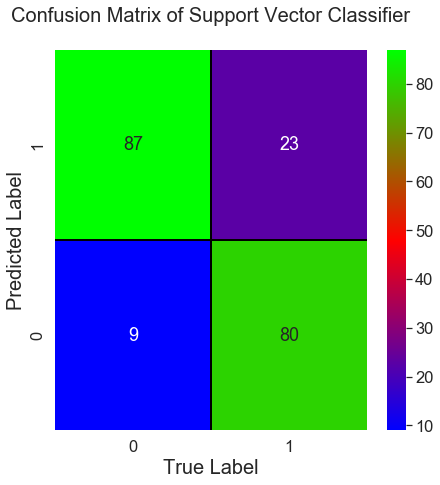

In [125]:
CM=confusion_matrix(test_y,svc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='brg',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Support Vector Classifier\n",fontsize=20)

plt.show()

# Ada Boost Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)

AdaBoostClassifier()

In [128]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1.]


In [129]:
print("Accuracy Score:",accuracy_score(test_y,ada_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,ada_pred),'\n')
print("Classification Report:\n",classification_report(test_y,ada_pred))

Accuracy Score: 0.8140703517587939 

Confusion Matrix:
 [[84 26]
 [11 78]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       110
         1.0       0.75      0.88      0.81        89

    accuracy                           0.81       199
   macro avg       0.82      0.82      0.81       199
weighted avg       0.82      0.81      0.81       199



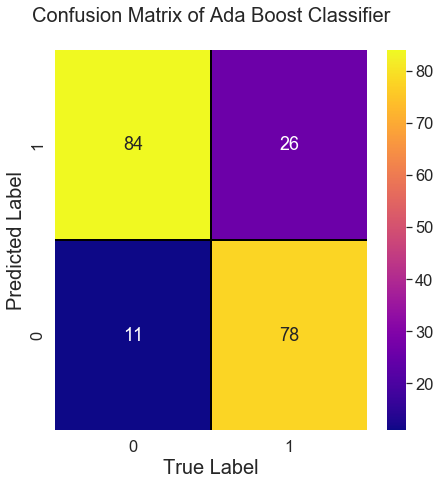

In [130]:
CM=confusion_matrix(test_y,ada_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='plasma',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Ada Boost Classifier\n",fontsize=20)

plt.show()

# Gradient Boosting Classifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gbc=GradientBoostingClassifier()
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [133]:
gbc_pred=gbc.predict(test_x)
print("Predicted value:\n",gbc_pred)

Predicted value:
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1.]


In [134]:
print("Accuracy Score:",accuracy_score(test_y,gbc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,gbc_pred),'\n')
print("Classification Report:\n",classification_report(test_y,gbc_pred))

Accuracy Score: 0.8241206030150754 

Confusion Matrix:
 [[85 25]
 [10 79]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.77      0.83       110
         1.0       0.76      0.89      0.82        89

    accuracy                           0.82       199
   macro avg       0.83      0.83      0.82       199
weighted avg       0.83      0.82      0.82       199



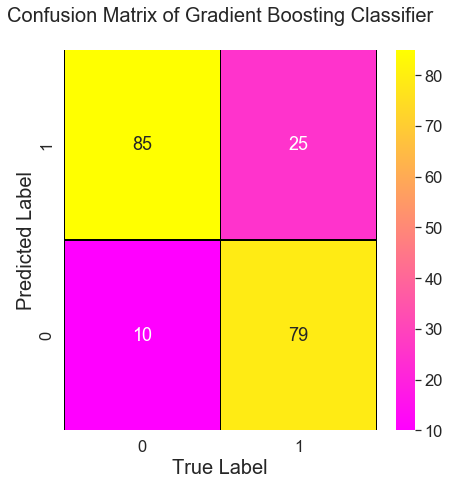

In [135]:
CM=confusion_matrix(test_y,gbc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='spring',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Gradient Boosting Classifier\n",fontsize=20)

plt.show()

# Extra Tree Classifier

In [136]:
from sklearn.tree import ExtraTreeClassifier

In [137]:
etc=ExtraTreeClassifier()
etc.fit(train_x,train_y)

ExtraTreeClassifier()

In [138]:
etc_pred=etc.predict(test_x)
print("Predicted value:\n",etc_pred)

Predicted value:
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1.]


In [139]:
print("Accuracy Score:",accuracy_score(test_y,etc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,etc_pred),'\n')
print("Classification Report:\n",classification_report(test_y,etc_pred))

Accuracy Score: 0.8090452261306532 

Confusion Matrix:
 [[86 24]
 [14 75]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       110
         1.0       0.76      0.84      0.80        89

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199



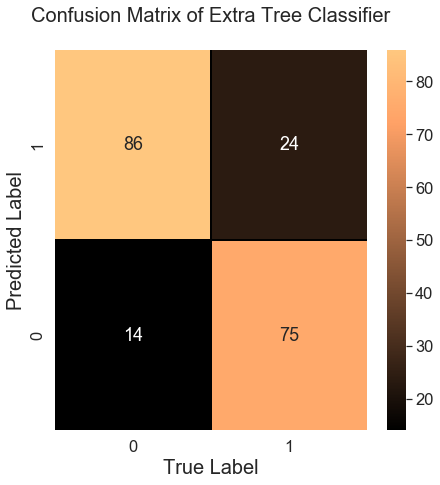

In [140]:
CM=confusion_matrix(test_y,etc_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='copper',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Extra Tree Classifier\n",fontsize=20)

plt.show()

In [141]:
for clf in (lg,rfc,dtc,gbc,ada,svc,knn,etc):
    clf.fit(train_x,train_y)
    clf_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,clf_pred))

LogisticRegression 0.7839195979899497
RandomForestClassifier 0.864321608040201
DecisionTreeClassifier 0.7889447236180904
GradientBoostingClassifier 0.8241206030150754
AdaBoostClassifier 0.8140703517587939
SVC 0.8391959798994975
KNeighborsClassifier 0.7839195979899497
ExtraTreeClassifier 0.7487437185929648


Random Forest Classifier gives a good accuracy score 86% as compare with other model

# Cross Validation

In [142]:
# Cross Validation for Logistic Regression

print('Cross Validation score for Logistic Regression',cross_val_score(lg,x,y,cv=5).mean())

Cross Validation score for Logistic Regression 0.774643821958845


In [143]:
# Cross Validation for Decision Tree Classifier

print('Cross Validation score for Decision Tree Classifier',cross_val_score(dtc,x,y,cv=5).mean())

Cross Validation score for Decision Tree Classifier 0.7842189393461799


In [144]:
# Cross Validation for Random Forest Classifier

print('Cross Validation score for Random Forest Classifier',cross_val_score(rfc,x,y,cv=5).mean())

Cross Validation score for Random Forest Classifier 0.8516725623010954


In [145]:
# Cross Validation for Support Vector Classifier

print('Cross Validation score for Support Vector Classifier',cross_val_score(svc,x,y,cv=5).mean())

Cross Validation score for Support Vector Classifier 0.8046043387199585


In [146]:
# Cross Validation for Gradient Boosting Classifier

print('Cross Validation score for Gradient Boosting Classifier',cross_val_score(gbc,x,y,cv=5).mean())

Cross Validation score for Gradient Boosting Classifier 0.8324410261439281


In [147]:
# Cross Validation for Ada Boost Classifier

print('Cross Validation score for Ada Boost Classifier',cross_val_score(ada,x,y,cv=5).mean())

Cross Validation score for Ada Boost Classifier 0.8073116607476832


In [148]:
# Cross Validation for Extra Tree Classifier

print('Cross Validation score for Extra Tree Classifier',cross_val_score(etc,x,y,cv=5).mean())

Cross Validation score for Extra Tree Classifier 0.7952314707798347


 After Analysis of various model and cross validation I choose Random Forest as my final model, as it gives a good score. Let's do the hyper parameter tuning to improve the accuracy

# Hyper parameter tuning

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
params={'n_estimators':[10,50,100],
       'max_depth':[2,4,6],
       'min_samples_leaf':range(2,10,1),
        'min_samples_split':range(2,10,1),
        'max_features':['auto','log2']}

In [151]:
grid_search=GridSearchCV(estimator=rfc,param_grid=params,verbose=3,cv=3)

In [152]:
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
[CV 1/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.759 total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.775 total time=   0.2s
[CV 2/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.771 total time=   0.2s
[CV 3/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.769 total time=   0.2s
[CV 1/3] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.773 total ti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 50, 100]},
             verbose=3)

In [153]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 100}

In [154]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=9)

In [155]:
grid_search.best_score_

0.8061878017538674

# Final Model

In [156]:
final_model=RandomForestClassifier(max_depth=6,max_features='auto',min_samples_leaf=3,min_samples_split=9,n_estimators=50)

In [157]:
final_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=50)

In [158]:
final_pred=final_model.predict(test_x)
print("Predicted value:\n",final_pred)

Predicted value:
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1.]


In [159]:
print("Accuracy Score:",accuracy_score(test_y,final_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(test_y,final_pred),'\n')
print("Classification Report:\n",classification_report(test_y,final_pred))

Accuracy Score: 0.8040201005025126 

Confusion Matrix:
 [[84 26]
 [13 76]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       110
         1.0       0.75      0.85      0.80        89

    accuracy                           0.80       199
   macro avg       0.81      0.81      0.80       199
weighted avg       0.81      0.80      0.80       199



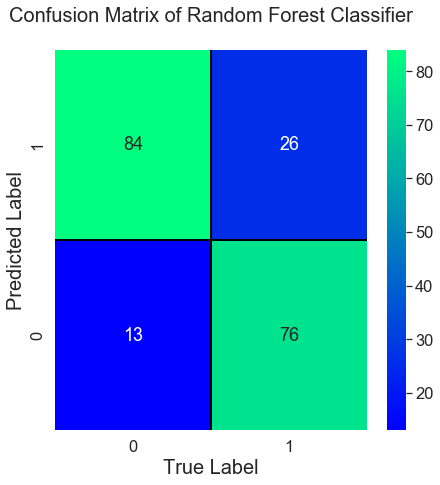

In [160]:
CM=confusion_matrix(test_y,final_pred)

x_axis=['0','1']
y_axis=['1','0']

figure,axes=plt.subplots(figsize=(7,7))

sns.set(font_scale=1.5)

sns.heatmap(CM, axes=axes,annot=True,linecolor='black',xticklabels=x_axis,yticklabels=y_axis,cmap='winter',fmt='0.0f',linewidth=.2)

plt.xlabel('True Label',fontsize=20)
plt.ylabel('Predicted Label',fontsize=20)

plt.title("Confusion Matrix of Random Forest Classifier\n",fontsize=20)

plt.show()

After tuning the parameter the accuracy score didn't increase.

# ROC AUC Curve

In [161]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

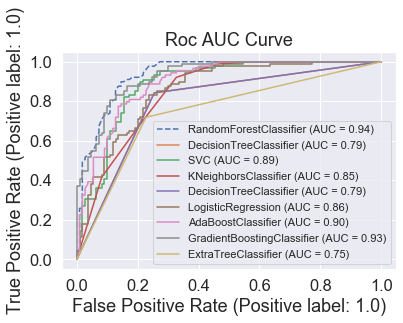

In [169]:

dist=plot_roc_curve(rfc,test_x,test_y,linestyle='--')
plot_roc_curve(dtc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(svc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(knn,test_x,test_y,ax=dist.ax_)
plot_roc_curve(dtc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(lg,test_x,test_y,ax=dist.ax_)
plot_roc_curve(ada,test_x,test_y,ax=dist.ax_)
plot_roc_curve(gbc,test_x,test_y,ax=dist.ax_)
plot_roc_curve(etc,test_x,test_y,ax=dist.ax_)
plt.title("Roc AUC Curve")

plt.legend(prop={'size':11},loc='lower right')
plt.show()

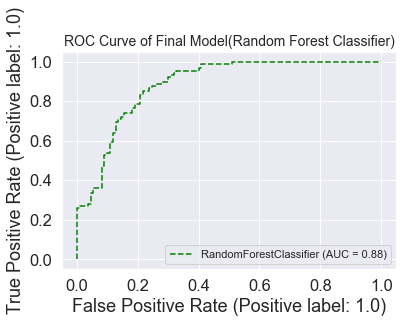

In [179]:
plot_roc_curve(final_model,test_x,test_y,linestyle='--',color='green')
plt.title('ROC Curve of Final Model(Random Forest Classifier)',fontsize=14)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Here is our ROC Curve for Final Model, we got the AUC Score 88%. Which is a good score

# Saving the Model

In [185]:
import pickle

In [186]:
filename='Customer_churn_prediction.pickle'

In [188]:
pickle.dump(final_model,open(filename,'wb'))

In [190]:
loaded_model=pickle.load(open(filename,'rb'))

In [191]:
loaded_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=50)

In [194]:
prediction=loaded_model.predict(test_x)
print("Predicted value:\n",prediction)

Predicted value:
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1.]


In [200]:
df=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
Predicted,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
Actual,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [202]:
df.to_csv('Cust_churn_prediction.csv')

Here is the actual and predicted value of Customer Churn. The value looks almost similar.